# **SALES PREDICTION**

## **Project Overview**
The project aims to leverage data science and machine learning techniques in Python to predict the car purchase amount that customers are likely to spend. This prediction is based on various customer attributes, including age, annual salary, credit card debt, net worth, and other factors. By accurately predicting car purchase amounts, businesses can optimize their advertising strategies and maximize their sales potential.
This project is a regression problem. It involves predicting a continuous numerical value (the car purchase amount) based on input features.
## **Business Understanding**
In businesses that offer products or services, understanding customer behavior and accurately predicting future sales is crucial. By leveraging data science and machine learning, businesses can make informed decisions regarding advertising costs, target audience segmentation, and advertising platform selection. This project will help businesses optimize their advertising strategies and improve their return on investment.

### Business Problem
The business problem is to predict the car purchase amount that customers are likely to spend based on their characteristics and attributes. This will allow businesses to allocate their advertising budget more effectively and tailor their marketing campaigns to target customers who are more likely to make high-value purchases.

### Objectives:
The main objectives of this project are as follows: 

- Build a machine learning model to predict car purchase amounts based on customer attributes.
- Evaluate the model's performance and accuracy.
- Provide insights to help businesses optimize their advertising strategies and maximize sales potential.

## **Data Understanding**
The dataset is obtained from Kaggle:[ Car Sales Price Prediction](https://www.kaggle.com/datasets/yashpaloswal/ann-car-sales-price-prediction)   
The provided dataset includes information about 500 customers. It contains the following columns:  

``customer name``: Customer's name (categorical)   
``customer e-mail``: Customer's email address (categorical)    
``country``: Customer's country (categorical)  
``gender``: Customer's gender (0 for male, 1 for female)  
``age``: Customer's age (numerical)  
``annual Salary``: Customer's annual salary (numerical)  
``credit card debt``: Customer's credit card debt (numerical)  
``net worth``: Customer's net worth (numerical)  
``car purchase amount``: The amount spent on car purchases (the target variable, numerical)  


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [13]:
df= pd.read_csv('car_purchasing.csv', encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [14]:
#get dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


The dataset has 500 entries and 9 column

In [15]:
df.shape

(500, 9)

In [16]:
# get dtypes
df.dtypes

customer name           object
customer e-mail         object
country                 object
gender                   int64
age                    float64
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object

In [17]:
df.value_counts()

customer name        customer e-mail                      country      gender  age        annual Salary  credit card debt  net worth     car purchase amount
Abel Stanton         eu.lacus.Quisque@congue.edu          Ecuador      1       39.717155  48567.07462    9724.031647       407401.37760  30394.82494            1
Octavius C. Spencer  Curabitur.consequat@miDuisrisus.com  Bangladesh   0       32.874925  61889.61618    12024.484570      133226.06170  24184.07443            1
Ortiz, Drew P.       tincidunt@vel.edu                    Seychelles   0       51.560544  49393.46784    11521.618900      475263.27590  42793.99320            1
Orson Kirby          cursus@nectellus.co.uk               Puerto Rico  1       53.354188  50867.94007    16732.306380      344916.17680  41357.17897            1
Orson Hyde           gravida.sit@eget.net                 Djibouti     1       37.497640  68688.40199    15796.318380      375889.63810  38930.55234            1
                                 

In [18]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


## **Data Preparation**

#### Check for missing values

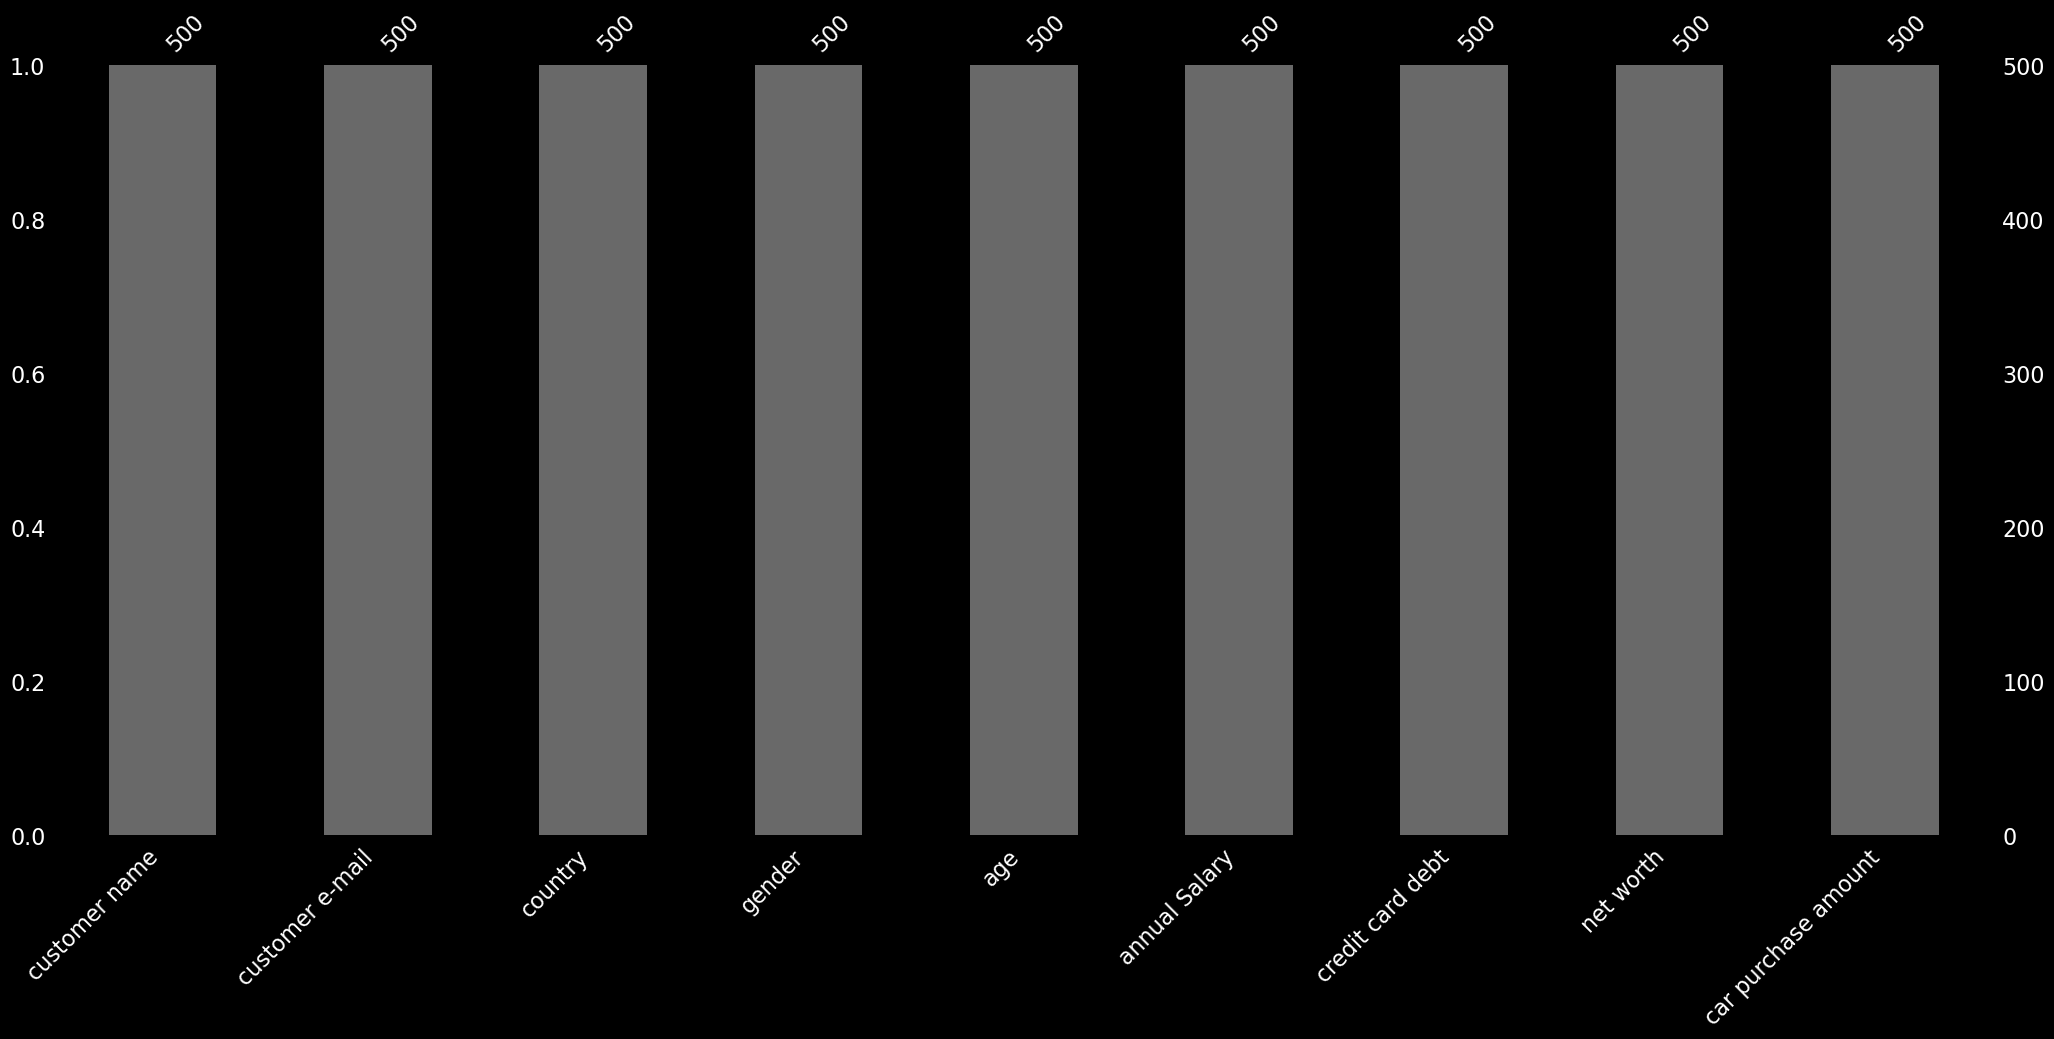

In [19]:
# Set the dark_background style
plt.style.use('dark_background')
import missingno as msno
msno.bar(df);

The dataset has no missing values

#### Check for duplicates

In [20]:
df.duplicated().sum()

0

There is no duplicated entries in the dataset

#### Check For outliers and remove it

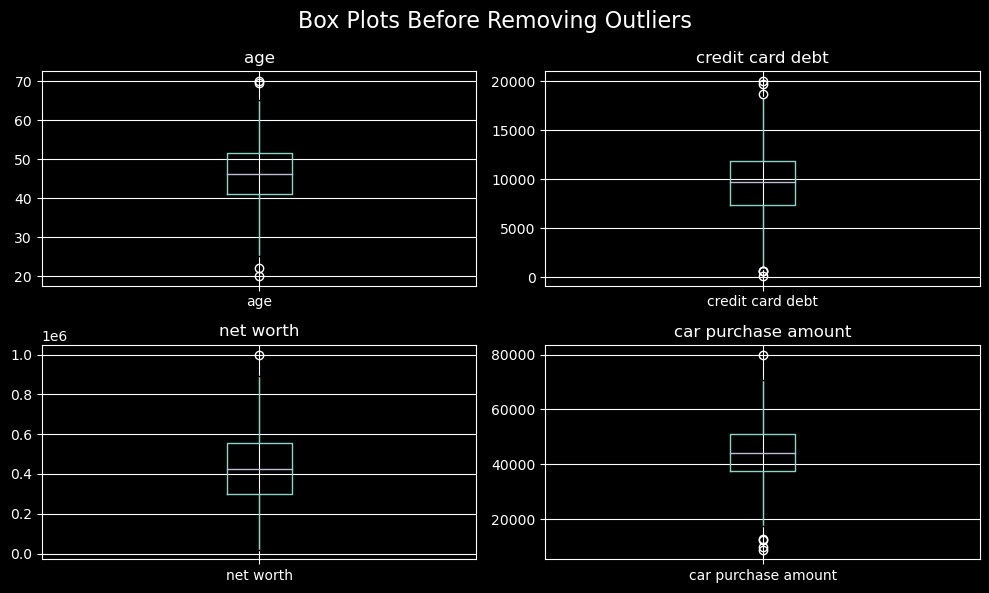

Number of rows with outliers before removal: 83


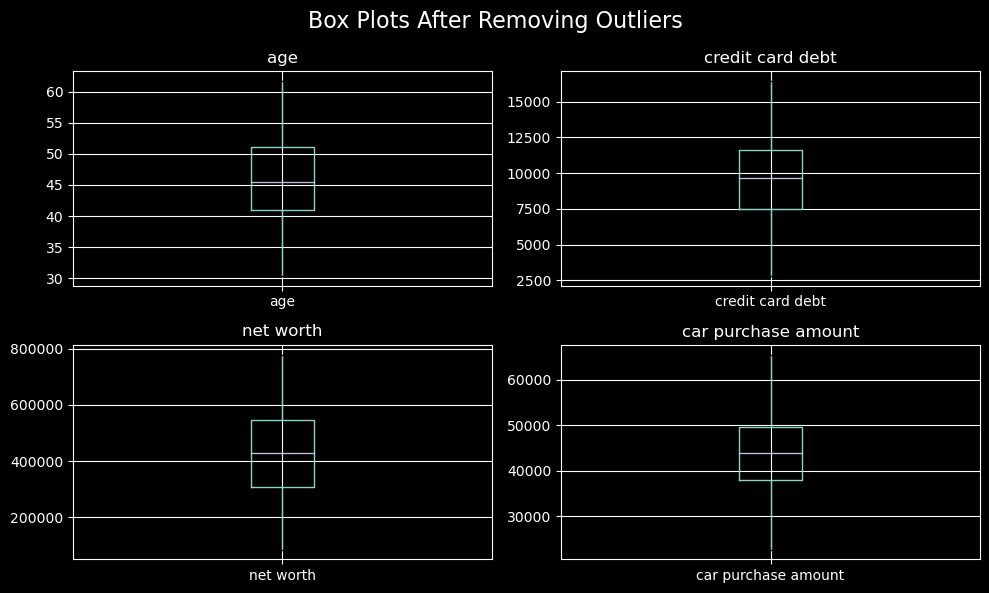

Number of rows after removing outliers: 417


In [21]:
# Set the dark_background style
plt.style.use('dark_background')

# Define the numerical columns you want to check for outliers
numerical_columns = ['age', 'credit card debt', 'net worth', 'car purchase amount']

# Create box plots before removing outliers
plt.figure(figsize=(10, 6))
plt.suptitle('Box Plots Before Removing Outliers', fontsize=16)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    df.boxplot(column=[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

# Calculate z-scores for numerical columns
z_scores = pd.DataFrame()
for column in numerical_columns:
    z_scores[column] = (df[column] - df[column].mean()) / df[column].std()

# Set a z-score threshold to identify outliers (e.g., 2 or -2 for a 95% confidence interval)
z_score_threshold = 2

# Identify outliers based on z-scores
outliers = z_scores[(z_scores.abs() > z_score_threshold).any(axis=1)]

# Display the number of rows with outliers before removal
print("Number of rows with outliers before removal:", len(outliers))

# Remove outliers 
df = df[~((z_scores.abs() > z_score_threshold).any(axis=1))]

# Create box plots after removing outliers
plt.figure(figsize=(10, 6))
plt.suptitle('Box Plots After Removing Outliers', fontsize=16)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    df.boxplot(column=[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

# Display the number of rows after removing outliers
print("Number of rows after removing outliers:", len(df))


####  Drop unnecessary columns

In [22]:
df = df.drop(columns=['customer name', 'customer e-mail'])
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
5,Liberia,1,56.824893,68499.85162,14179.472440,428485.3604,56611.99784


## **Exploratory Data Analysis**

### Univariate Analysis
Univariate analysis involves the analysis of a single variable at a time

#### Car purchase amount Distribution

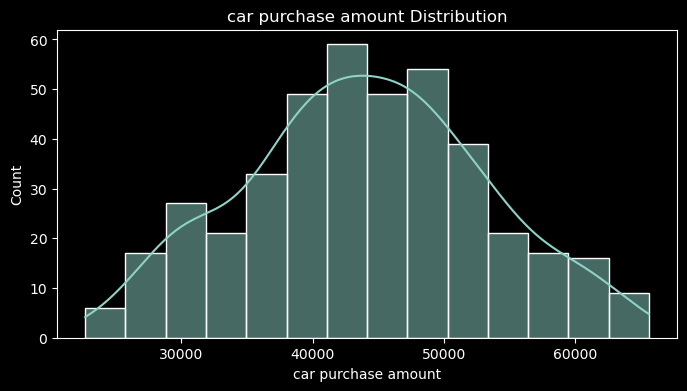

In [23]:
#plot ar purchase amount Distribution
plt.figure(figsize=(8, 4))
sns.histplot(x=df['car purchase amount'], kde=True)
plt.title('car purchase amount Distribution')
plt.show()

* Majority of the car purchase amount falls between 40000 to 50000
* few customers purchase cars above 70000 and below 20000
* Marketing Strategies: The distribution suggests a clear separation between customer groups hence  marketing strategies differently for each group. For example, offering discounts to customers in the lower spending group to encourage them to spend more.


#### Age Distribution

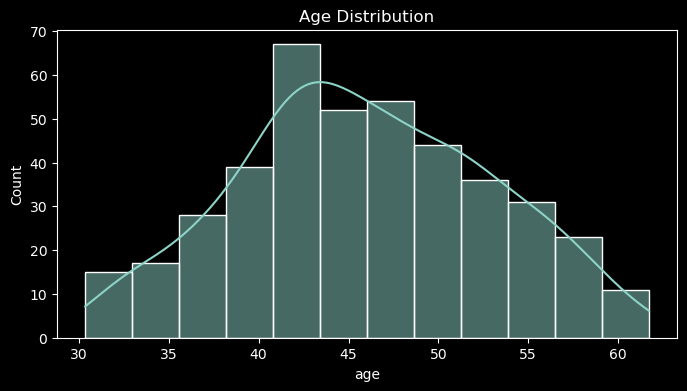

In [24]:
# Univariate analysis for 'age'
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

* Majority of the customers are above 30 years. 
* The highest purchase is from the age group is between 41 and 43 It is wise  design marketing campaigns specifically targeting the age group.

### Bivariate Analysis
Bivariate analysis involves analyzing the relationship between two variables. 

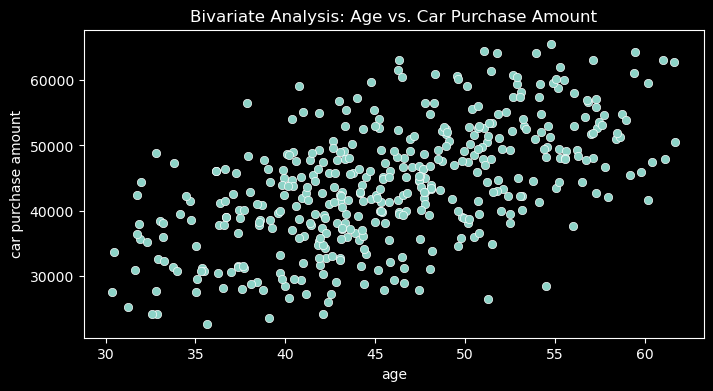

In [25]:
# Bivariate analysis between two numeric features (e.g., 'age' and 'car purchase amount')
plt.figure(figsize=(8, 4))
sns.scatterplot(x='age', y='car purchase amount', data=df)
plt.title('Bivariate Analysis: Age vs. Car Purchase Amount')
plt.show()


* Positive Relationship:scatterplot exhibits a clear upward trend, it suggests that as customers' ages increase, their car purchase amounts tend to increase. This indicates a positive correlation between age and car purchase amount.


#### Top 10 Countries by Car Purchase Amount

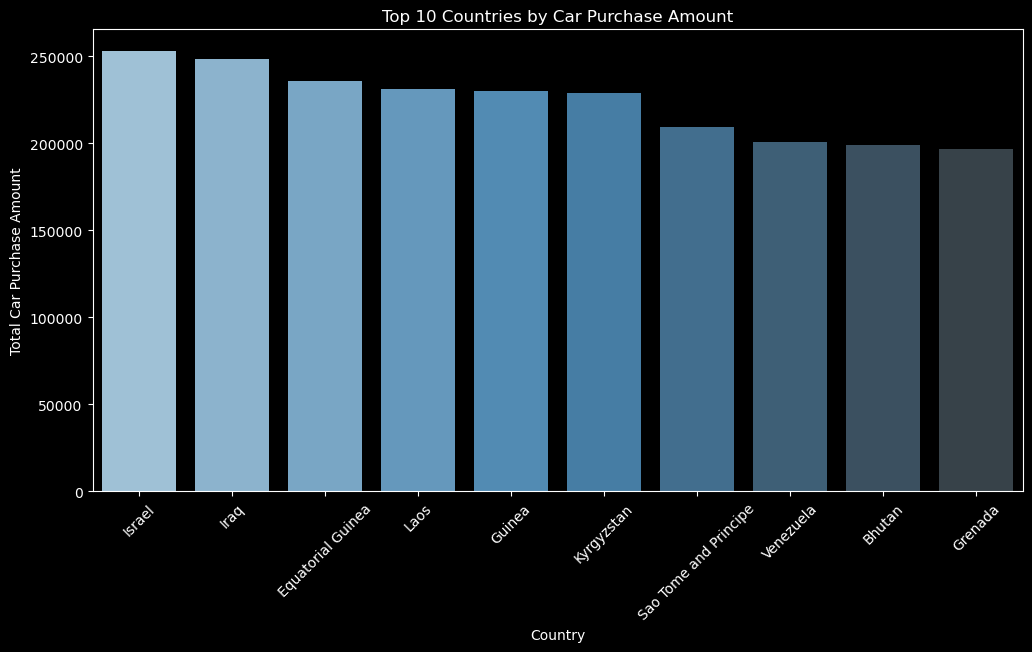

In [26]:
# Calculate the total car purchase amount for each country
total_purchase_by_country = df.groupby('country')['car purchase amount'].sum().reset_index()

# Sort the countries by total purchase amount in descending order
total_purchase_by_country = total_purchase_by_country.sort_values(by='car purchase amount', ascending=False)

# Select the top 10 countries
top_10_countries = total_purchase_by_country.head(10)

# Create a bar plot for the top 10 countries with shades of blue
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='car purchase amount', data=top_10_countries, palette='Blues_d')
plt.title('Top 10 Countries by Car Purchase Amount')
plt.xlabel('Country')
plt.ylabel('Total Car Purchase Amount')
plt.xticks(rotation=45)
plt.show()

* Market Concentration: Concentration of car purchase spending is evident, with some countries significantly outspending others. This concentration may present opportunities for targeted marketing and business expansion in the top-performing countries.
* The top countries with high spending can attract competition from various car manufacturers and dealers. Understanding the competitive landscape in these markets is crucial
* Global Expansion: The top-performing countries may be prime candidates for global expansion or further investment

#### Gender vs. Mean Car Purchase Amount

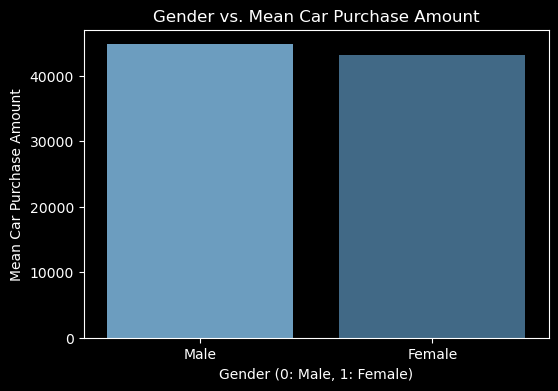

In [27]:
# Calculate the mean car purchase amount for each gender
mean_purchase_by_gender = df.groupby('gender')['car purchase amount'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='gender', y='car purchase amount', data=mean_purchase_by_gender, palette='Blues_d')
plt.title('Gender vs. Mean Car Purchase Amount')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Mean Car Purchase Amount')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

* Gender-Based Spending: On average, males spend slightly more on car purchases than females. This indicates a gender-based difference in car buying behavior.
* Consumer Profiling: This information allows for the creation of customer profiles that can guide marketing and product development. Understanding the spending habits of both genders can help in building more effective customer personas.

#### Credit Card Debt vs. Car Purchase Amount

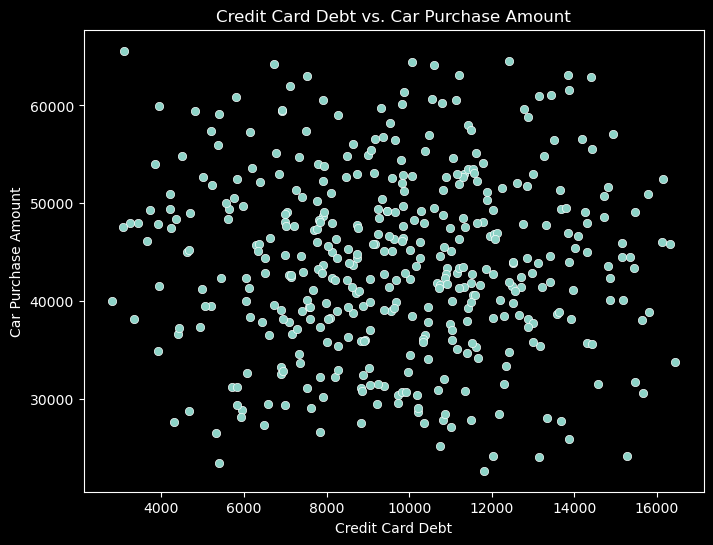

In [28]:
# Create a scatterplot of 'credit card debt' vs. 'car purchase amount'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='credit card debt', y='car purchase amount', data=df)
plt.title('Credit Card Debt vs. Car Purchase Amount')
plt.xlabel('Credit Card Debt')
plt.ylabel('Car Purchase Amount')
plt.show()

* No Clear Relationship: points on the scatterplot are scattered without a noticeable trend, it may suggest that there is no strong linear correlation between credit card debt and car purchase amount.

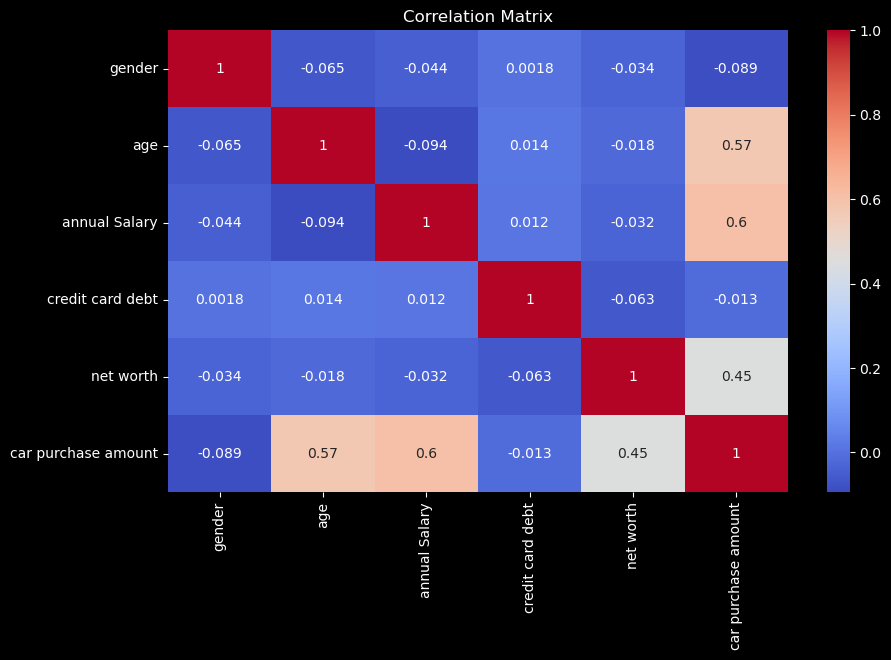

In [29]:
# Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

* The "age" and "annual salary" have a positive correlation of approximately 0.6. This suggests that, in this dataset, older customers tend to have higher annual salaries. This positive correlation may indicate a relationship between age and income.
* The "annual salary" and "car purchase amount" have a positive correlation of approximately 0.6. This implies that customers with higher annual salaries are more likely to spend more on car purchases.
* The "credit card debt" has relatively weak correlations with other features, indicating that credit card debt is not strongly related to age, annual salary, net worth, or car purchase amount.

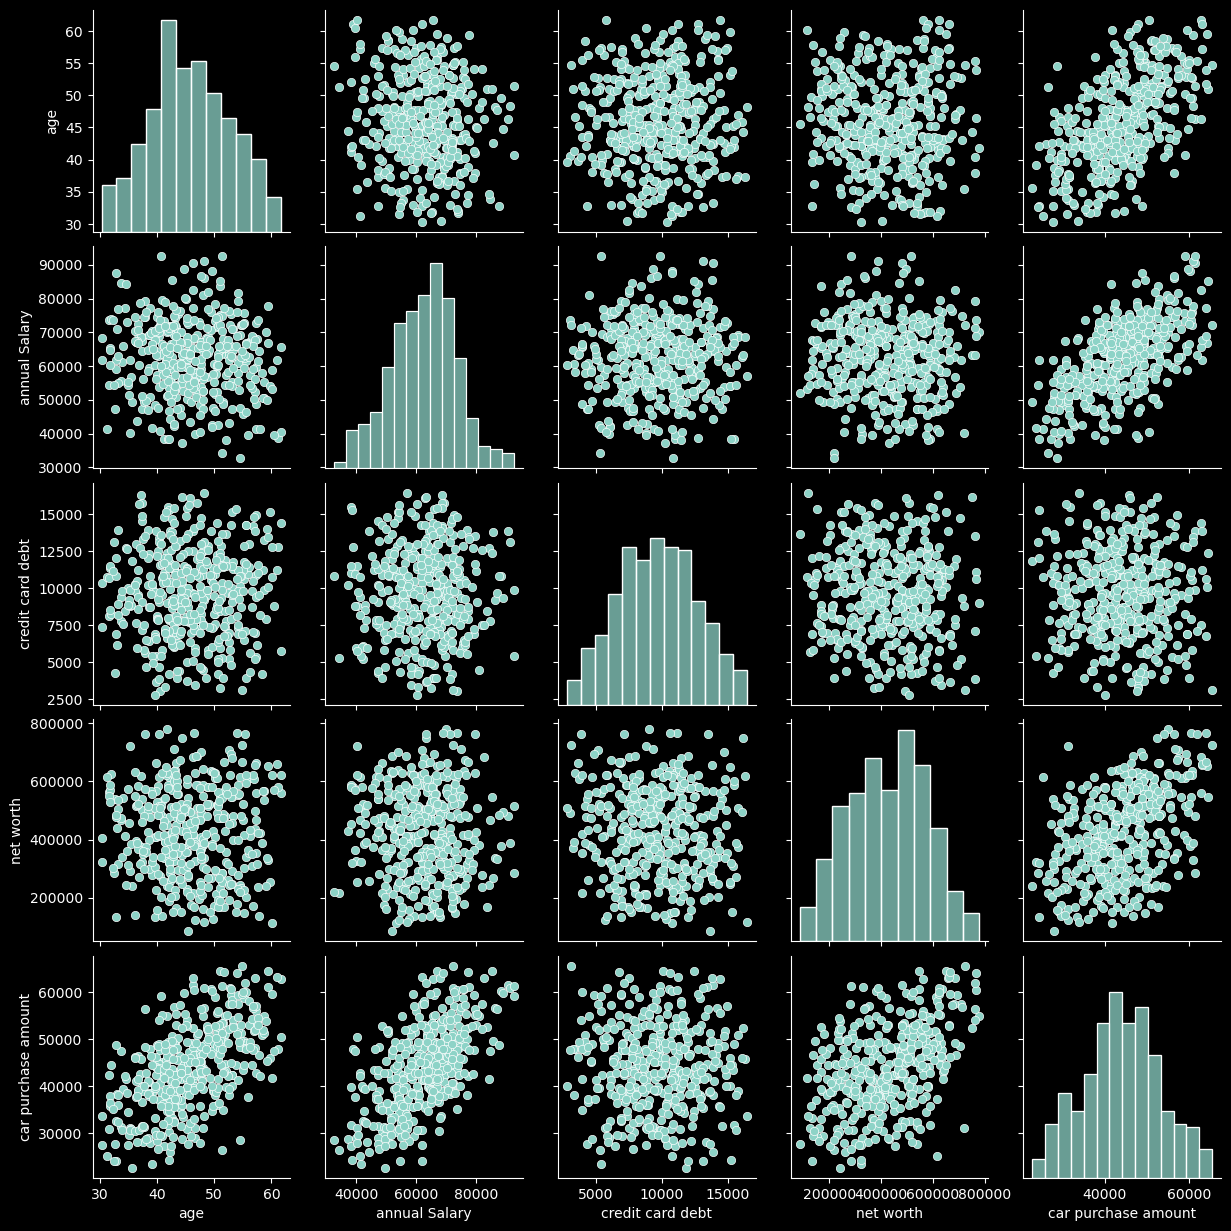

In [30]:
# Data distribution for numeric features
numeric_features = ['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']
# Scatter plots for feature relationships
sns.pairplot(df[numeric_features])
plt.show()

* Age vs. Car Purchase Amount: Older customers tend to make higher-value car purchases.
* Annual Salary vs. Car Purchase Amount: Customers with higher annual salaries spend more on car purchases.
* Net Worth vs. Car Purchase Amount: Customers with higher net worth tend to make higher car purchases.
* Data Distribution: Distributions of "annual salary," "credit card debt," "net worth," and "car purchase amount" are right-skewed, indicating most customers have lower values with a few making significantly higher purchases.
* Potential Outliers: Some outliers exist, especially in the "net worth" vs. "car purchase amount" plot, representing customers with exceptionally high net worth and car purchase amounts.
* Variable Relationships: The pair plot helps identify potential predictors for car purchase amounts.

## **Data Preprocesing**

### Feature Scaling
Scale the numerical features to ensure they have a similar scale 

In [31]:
scaler = MinMaxScaler()
df[['gender', 'age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']] = scaler.fit_transform(df[['gender', 'age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']])
df.head()


,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0.0,0.366790,0.503806,0.645427,0.221409,0.294561
1,Belize,0.0,0.335504,0.567962,0.496232,0.642774,0.522805
2,Algeria,1.0,0.408282,0.353011,0.612530,0.797884,0.471772
4,Brazil,1.0,0.859851,0.452229,0.187481,0.685097,0.774490
5,Liberia,1.0,0.844262,0.598962,0.833721,0.494887,0.790722


### Encoding Categorical Data
The  country is categorical and needs to be Encoded into numerical values for modeling.

In [32]:
# Categorical data encoding (one-hot encoding)
df = pd.get_dummies(df, columns=['country'])
df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount,country_Afghanistan,country_Algeria,country_American Samoa,country_Andorra,...,country_Venezuela,country_Viet Nam,"country_Virgin Islands, British","country_Virgin Islands, United States",country_Wallis and Futuna,country_Western Sahara,country_Yemen,country_Zimbabwe,country_marlal,country_Åland Islands
0,0.0,0.366790,0.503806,0.645427,0.221409,0.294561,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.335504,0.567962,0.496232,0.642774,0.522805,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.408282,0.353011,0.612530,0.797884,0.471772,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.859851,0.452229,0.187481,0.685097,0.774490,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1.0,0.844262,0.598962,0.833721,0.494887,0.790722,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Assign the variables

In [33]:
X = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']

In [34]:
X.head()

,gender,age,annual Salary,credit card debt,net worth,country_Afghanistan,country_Algeria,country_American Samoa,country_Andorra,country_Angola,...,country_Venezuela,country_Viet Nam,"country_Virgin Islands, British","country_Virgin Islands, United States",country_Wallis and Futuna,country_Western Sahara,country_Yemen,country_Zimbabwe,country_marlal,country_Åland Islands
0,0.0,0.366790,0.503806,0.645427,0.221409,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.335504,0.567962,0.496232,0.642774,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.408282,0.353011,0.612530,0.797884,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.859851,0.452229,0.187481,0.685097,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1.0,0.844262,0.598962,0.833721,0.494887,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split the data into training and testing sets

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Modeling**

### Baseline Model : Linear Regression  Model

Linear regression is a simple and interpretable model. It assumes a linear relationship between the features and the target variable, making it a good starting point for regression tasks.

In [36]:
# Create a Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model to the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions
y_pred_test = linear_reg_model.predict(X_test)
y_pred_train = linear_reg_model.predict(X_train)



In [37]:
# Training data evaluation
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

print("Training Data Metrics:")
print(f"MAE: {mae_train:.5f}")
print(f"MSE: {mse_train:.5f}")
print(f"RMSE: {rmse_train:.5f}")
print(f"R-squared (R^2): {r2_train:.5f}")

# Test data evaluation
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTest Data Metrics:")
print(f"MAE: {mae_test:.5f}")
print(f"MSE: {mse_test:.5f}")
print(f"RMSE: {rmse_test:.5f}")
print(f"R-squared (R^2): {r2_test:.5f}")


Training Data Metrics:
MAE: 0.00002
MSE: 0.00000
RMSE: 0.00002
R-squared (R^2): 1.00000

Test Data Metrics:
MAE: 50925612.65807
MSE: 106001596424029584.00000
RMSE: 325578863.60148
R-squared (R^2): -2264288920907934208.00000


The results of the linear regression model evaluation show that the model performs exceptionally well on the training data, with nearly perfect accuracy.
The linear regression model performs perfectly on the training data but poorly on the test data, indicating overfitting. Overfitting occurs when the model fits the training data too closely and cannot generalize to new data.

### Second Model: Ridge Regression

A Ridge Regression model, also known as L2-regularized linear regression, is a linear regression model that incorporates regularization to address issues like multicollinearity and overfitting

In [38]:
# Create a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  
# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_test = ridge_model.predict(X_test)
y_pred_train = ridge_model.predict(X_train)



In [39]:
# Training data evaluation
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

print("Training Data Metrics:")
print(f"MAE: {mae_train:.5f}")
print(f"MSE: {mse_train:.5f}")
print(f"RMSE: {rmse_train:.5f}")
print(f"R-squared (R^2): {r2_train:.5f}")

# Test data evaluation
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTest Data Metrics:")
print(f"MAE: {mae_test:.5f}")
print(f"MSE: {mse_test:.5f}")
print(f"RMSE: {rmse_test:.5f}")
print(f"R-squared (R^2): {r2_test:.5f}")


Training Data Metrics:
MAE: 0.01373
MSE: 0.00029
RMSE: 0.01708
R-squared (R^2): 0.99348

Test Data Metrics:
MAE: 0.01937
MSE: 0.00061
RMSE: 0.02471
R-squared (R^2): 0.98696


The Ridge Regression model demonstrates good performance. It provides accurate predictions on both the training and test data, and the R-squared values are close to 1, indicating a strong fit. This suggests that the model has effectively captured the underlying patterns in the data while maintaining good generalization to unseen data.
Ridge Regression outperforms Linear Regression in terms of generalization and is a more robust choice for making predictions on new, unseen data. Ridge Regression effectively mitigates overfitting and provides better overall model performance in this context

### Third Model : Random Forest Model
A Random Forest model is an ensemble learning method used for both classification and regression tasks. It's a versatile and powerful machine learning algorithm that builds a forest of decision trees during training and combines their predictions for making accurate and robust predictions.

In [40]:
# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100) 
# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_test = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)



In [41]:
# Training data evaluation
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

print("Training Data Metrics:")
print(f"MAE: {mae_train:.5f}")
print(f"MSE: {mse_train:.5f}")
print(f"RMSE: {rmse_train:.5f}")
print(f"R-squared (R^2): {r2_train:.5f}")

# Test data evaluation
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTest Data Metrics:")
print(f"MAE: {mae_test:.5f}")
print(f"MSE: {mse_test:.5f}")
print(f"RMSE: {rmse_test:.5f}")
print(f"R-squared (R^2): {r2_test:.5f}")


Training Data Metrics:
MAE: 0.01533
MSE: 0.00045
RMSE: 0.02110
R-squared (R^2): 0.99006

Test Data Metrics:
MAE: 0.04287
MSE: 0.00343
RMSE: 0.05857
R-squared (R^2): 0.92673


Random Forest Regression maintains a strong fit to the training data with a high R-squared (0.99), similar to the Ridge Regression model.
n the test data, Random Forest Regression performs well with an R-squared of 0.92, indicating that it explains a significant portion of the variance in the test data
Random Forest Regression shows strong performance, especially in comparison to Linear Regression, which had issues with overfitting, and Ridge Regression, which performed well but had a slight drop in test data performance compared to Random Forest.

### Fourth Model: XGBoost Regression Model
XGBoost (Extreme Gradient Boosting) is a popular machine learning algorithm that is commonly used for regression and classification tasks.

In [42]:
# Create an XGBoost Regression model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)  # You can adjust hyperparameters

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_test = xgb_model.predict(X_test)
y_pred_train = xgb_model.predict(X_train)



In [43]:
# Training data evaluation
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

print("Training Data Metrics:")
print(f"MAE: {mae_train:.5f}")
print(f"MSE: {mse_train:.5f}")
print(f"RMSE: {rmse_train:.5f}")
print(f"R-squared (R^2): {r2_train:.5f}")

# Test data evaluation
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTest Data Metrics:")
print(f"MAE: {mae_test:.5f}")
print(f"MSE: {mse_test:.5f}")
print(f"RMSE: {rmse_test:.5f}")
print(f"R-squared (R^2): {r2_test:.5f}")


Training Data Metrics:
MAE: 0.00097
MSE: 0.00000
RMSE: 0.00125
R-squared (R^2): 0.99997

Test Data Metrics:
MAE: 0.03727
MSE: 0.00259
RMSE: 0.05093
R-squared (R^2): 0.94460


XGBoost Regression demonstrates an almost perfect fit to the training data with an exceptionally high R-squared of 0.99. It explains a vast majority of the variance in the training data.
On the test data, XGBoost Regression maintains strong performance with an R-squared of 0.94. It provides good generalization to the test data, making it one of the top-performing models in this comparison.
XGBoost Regression stands out as an excellent choice for your car purchase amount prediction task, with outstanding training and test data performance.

In [44]:
# Define the hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200],  # Number of trees 
    'learning_rate': [0.01, 0.1],  # Learning rate
    'max_depth': [3, 4],  # Maximum depth of each tree
    'min_child_weight': [1, 2],  # Minimum sum of instance weight needed in a child
    'subsample': [0.7, 0.8],  # Subsample ratio of the training data
    'colsample_bytree': [0.7, 0.8],  # Subsample ratio of columns by tree
}

# Create the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Create the Grid Search object with cross-validation
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Make predictions using the best model
y_pred_test = best_xgb_model.predict(X_test)
y_pred_train = best_xgb_model.predict(X_train)



Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 200, 'subsample': 0.7}


In [45]:
# Training data evaluation
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

print("Training Data Metrics:")
print(f"MAE: {mae_train:.5f}")
print(f"MSE: {mse_train:.5f}")
print(f"RMSE: {rmse_train:.5f}")
print(f"R-squared (R^2): {r2_train:.5f}")

# Test data evaluation
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTest Data Metrics:")
print(f"MAE: {mae_test:.5f}")
print(f"MSE: {mse_test:.5f}")
print(f"RMSE: {rmse_test:.5f}")
print(f"R-squared (R^2): {r2_test:.5f}")


Training Data Metrics:
MAE: 0.00641
MSE: 0.00007
RMSE: 0.00829
R-squared (R^2): 0.99847

Test Data Metrics:
MAE: 0.02230
MSE: 0.00092
RMSE: 0.03031
R-squared (R^2): 0.98038


The tuned XGBoost model performs better on unseen data, suggesting that it's a more reliable model for making predictions on new customer data.
The model perfromed better than the untuned model hence the model that is best in predicting Sales and our Choosen Model

## **Recommendation**

Based on the exploratory data analysis and the performance of the final XGBoost model, here are some recommendations:

* Marketing Strategies: Tailor marketing campaigns to target specific customer groups based on their characteristics. For example, customers in the lower age group and with lower annual salaries may respond well to different marketing strategies than those in the higher age and income group.
* Country-Specific Campaigns: Concentrate marketing efforts in countries with higher car purchase amounts. The top-performing countries in terms of car purchases may present great opportunities for business expansion or targeted advertising campaigns.
* Gender-Based Campaigns: Create gender-specific marketing campaigns. Since males tend to spend slightly more on car purchases, understanding the preferences and needs of each gender can help in designing effective advertising strategies.
* Age-Based Campaigns: Develop age-specific marketing campaigns, especially targeting the age group with the highest car purchase amounts (e.g., customers between 41 and 43 years old).
* Credit Card Debt: Although credit card debt doesn't show a strong correlation with car purchase amount, it's essential to monitor this aspect of customer data and tailor financial services or advice accordingly.
* Regular Data Updates: Ensure that customer data is regularly updated to reflect current market trends and customer behaviors. This will help in keeping marketing strategies up-to-date.
* Use of XGBoost: Utilize the tuned XGBoost model for car purchase amount predictions. This model has shown strong performance, both in training and test data, and should be used for making predictions on new customer data.

## **Conclusions**
The project provides valuable insights for businesses aiming to optimize their advertising strategies and maximize sales potential. The XGBoost Regression model is recommended for accurate predictions of car purchase amounts, and it can be deployed to make real-time predictions for better decision-making.

## **Next Step**
* Deploy the XGBoost Regression model to predict car purchase amounts for new customers. This will help in optimizing advertising budgets and personalizing marketing campaigns.
* Monitor and analyze the model's performance regularly. Update the model as new data becomes available to ensure its accuracy and relevance.
* Explore more advanced feature engineering techniques, such as creating new features or using feature selection methods to improve model performance.
* Consider customer segmentation techniques to target specific customer groups with tailored marketing strategies.
* Continuously collect and update customer data to adapt to changing market conditions and consumer behaviors.


## **Author**
- Marwa Osman
- marwaosman9975@gmail.com
- [LinkedIn](https://www.linkedin.com/in/marwa-osman-00190b222/)
- [GitHub](https://github.com/marwa9975)
